In [1]:
# importing various library pandas for loading data and numpy for linear algebra, scikit-learn for data pre processing
#and model development abd seaborn for plotting regression plots

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
house_price=pd.read_csv('C:/Users/NIRBHAY MAURYA/Desktop/hello/ML-ProjectYard/delhi housing price prediction/dataset/Delhi.csv') #loading the data

In [3]:
house_price.head()     #printing first five row of our dataframe

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
house_price.rename(columns={'No. of Bedrooms':'Bedrooms'},inplace=True)

In [5]:
# here we are splitting the data set into two parts 1. for training purpose and 2. for testing purpose

house_price_train, house_price_test=train_test_split(house_price,test_size=0.2,random_state=47)

In [6]:
house_price_train.describe()

,Price,Area,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,1.615529e+07,1287.029265,2.670335,0.799150,5.434217,5.480990,5.425963,5.442721,5.422461,5.446473,...,5.666083,5.426463,5.466733,5.423962,5.404952,5.425213,5.418709,5.422961,5.404952,5.421211
std,4.769512e+07,938.110109,0.833004,0.400687,4.375833,4.322502,4.385125,4.366222,4.389056,4.361970,...,4.099440,4.384563,4.338881,4.387372,4.408619,4.385968,4.393261,4.388495,4.408619,4.390459
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+06,800.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+06,1000.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.580000e+07,1650.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


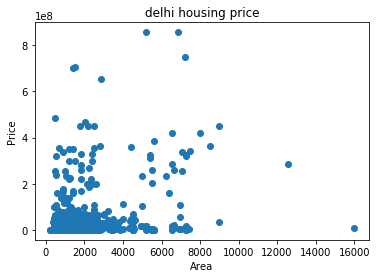

In [7]:
plt.plot(house_price_train['Area'],house_price_train['Price'],'o')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('delhi housing price')
plt.show()

#conclusion: In the below graph we can see the maximum data is skewed at one side
#to solve this we can apply two process 1. remove outliers 2.apply linear algebra over features

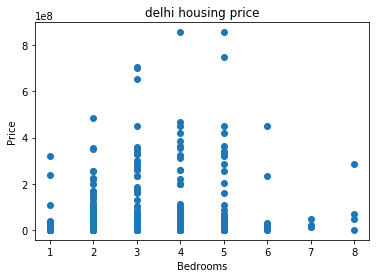

In [8]:
plt.plot(house_price_train['Bedrooms'],house_price_train['Price'],'o')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('delhi housing price')
plt.show()

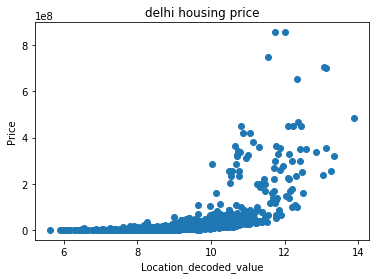

In [9]:
#Now, there is a string type feature in our data set which is 'Location', since price of any house is extensively dependent on 
#the location and it is usually seen that price is seen as- rs per unit area(sq ft).
#house_price_train['Price']/house_price_train['Area'] it is rs per unit area(sq ft) it will also skewed (interprated from graph 
#b/w price and area) so to remove this we will apply logrthimic function and now below we can see how nicely and extensively price
#is dependent on K-value. 

K=np.log(house_price_train['Price']/house_price_train['Area'])

plt.plot(K,house_price_train['Price'],'o')
plt.xlabel('Location_decoded_value')
plt.ylabel('Price')
plt.title('delhi housing price')
plt.show()

In [10]:
matrix_corr=house_price_train.corr()
matrix_corr['Price']  #dependence of price over features

Price                  1.000000
Area                   0.375564
Bedrooms               0.196730
Resale                -0.009809
MaintenanceStaff       0.100897
Gymnasium              0.102518
SwimmingPool           0.101445
LandscapedGardens      0.101522
JoggingTrack           0.100946
RainWaterHarvesting    0.101780
IndoorGames            0.100701
ShoppingMall           0.100709
Intercom               0.102388
SportsFacility         0.103712
ATM                    0.100645
ClubHouse              0.102836
School                 0.100609
24X7Security           0.101289
PowerBackup            0.104120
CarParking             0.100806
StaffQuarter           0.100851
Cafeteria              0.100748
MultipurposeRoom       0.100761
Hospital               0.100542
WashingMachine         0.100970
Gasconnection          0.105040
AC                     0.101796
Wifi                   0.100557
Children'splayarea     0.104702
LiftAvailable          0.100577
BED                    0.100995
VaastuCo

In [11]:
# below fn is made for replacing unknown value which are represented by 9. I have taken 0.5 because probability of occuring
# 0 or 1 is 0.5

def na_remover(data):
    data.replace(9,0.5,inplace=True)

In [12]:
# Below fn contains two part 1. Location decoder by above explained method.
# 2.A pipeline which is doing two work-1. replacing unkown values by above method
#                                       2. scaling the features by standard scaler
# the below fn is returning transformed feature for house prediction.

def data_processing(data):
    K=np.log(data['Price']/data['Area'])
    data['Location']=K
    house_feature=data.drop(['Price'],axis=1)
    my_pipeline=Pipeline([('rem',na_remover(house_feature)),
                          ('std',StandardScaler())   
                         ])
    return my_pipeline.fit_transform(house_feature)

In [13]:
# here first we apply log fn over price to remove skewedness which will be label for train fn.
# X features for train can get transformed in numpy array by pipeline via calling it by fn
Y_train=np.log(house_price_train['Price'])
X_train=data_processing(house_price_train)

C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
X_train.shape


(3998, 39)

## Different model training 

In [15]:
model1=LinearRegression().fit(X_train,Y_train)   # fitting LinearRegression model

In [16]:
model2=Ridge().fit(X_train,Y_train)  #fitting Ridge model

In [17]:
model3=DecisionTreeRegressor().fit(X_train,Y_train)    #fitting DecisionTreeRegressor  model

In [18]:
model4=RandomForestRegressor().fit(X_train,Y_train)     #fitting RandomForestRegressor model

In [19]:
# now we are using train features in ordere to predict price but predicted value  will be not actual predicted price
#it will log() of that.
model1_predict=model1.predict(X_train)
model2_predict=model2.predict(X_train)
model3_predict=model3.predict(X_train)
model4_predict=model4.predict(X_train)
#Now, we will draw scatter plots.

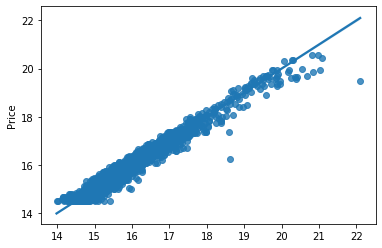

In [20]:
sns.regplot(model1_predict,Y_train)

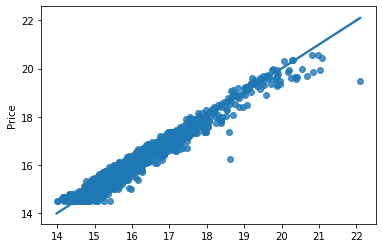

In [21]:
sns.regplot(model2_predict,Y_train)

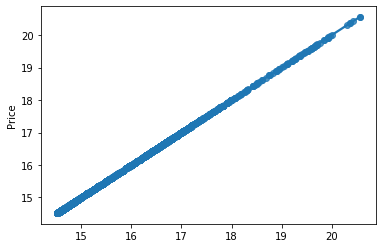

In [22]:
sns.regplot(model3_predict,Y_train)

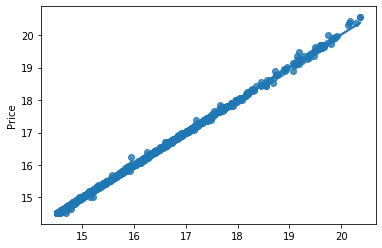

In [23]:
sns.regplot(model4_predict,Y_train)

## testing

In [24]:
# here we are doing testing 
# 1. taking out testing label.
Y_test=house_price_test['Price']


In [25]:
# processing the test data and converting to feedable ML data
X_test=data_processing(house_price_test)

C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#here we are predicting the value but the predicted values will not be price of houses  it will be log() of price.
#to convert that values into the prices we have to apply exponential fn(predicted_price=np.exp(predicted_value)).
model1_test=np.exp(model1.predict(X_test))
model2_test=np.exp(model2.predict(X_test))
model3_test=np.exp(model3.predict(X_test))
model4_test=np.exp(model4.predict(X_test))
##Now, we will draw scatter plots for predicted test price and given test price.

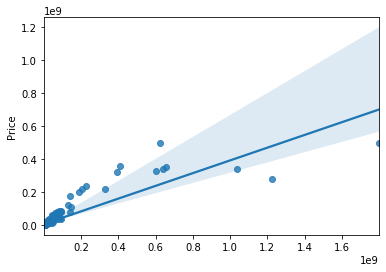

In [27]:
sns.regplot(model1_test,Y_test)

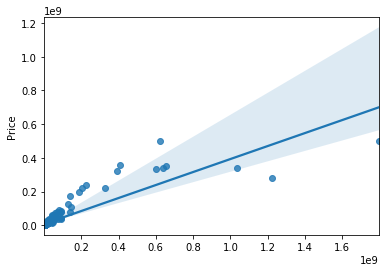

In [28]:
sns.regplot(model2_test,Y_test)

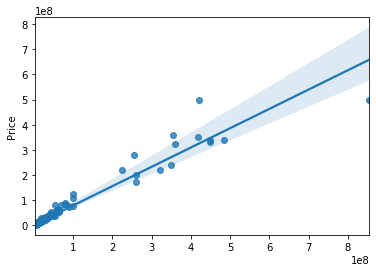

In [29]:
sns.regplot(model3_test,Y_test)

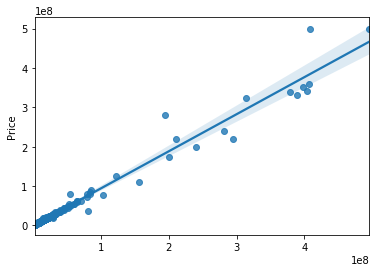

In [30]:
sns.regplot(model4_test,Y_test)

In [31]:
# calculating r2_score for different models.
model1_r2=r2_score(model1_test,Y_test)

model2_r2=r2_score(model2_test,Y_test)

model3_r2=r2_score(model3_test,Y_test)

model4_r2=r2_score(model4_test,Y_test)

In [32]:
print("model1_error:{}\nmodel2_error:{}\nmodel3_error:{}\nmodel4_error:{}".format(model1_r2,model2_r2,model3_r2,model4_r2))

model1_error:0.5731528616784738
model2_error:0.5736813126152394
model3_error:0.9092927115180608
model4_error:0.9733970066955117


In [33]:
# Ideal r2 value is considered as 1
# In above results we can see nodel4 has r2_value=0.97 which is very good value.
#so.model4 obtained by RandomForestRegressor is preffered model over all the models.

## model exporting

In [34]:
from sklearn.externals import joblib

C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [35]:
joblib.dump(model4,'delhi_house_price')

['delhi_house_price']

## data processing for prediction purposes.

In [36]:
def processing(data):
    data['Location']=K=np.log(house_price_train['Price'].mean()/house_price_train['Area'].mean())
    pipeline_for_prediction=Pipeline([('rem',na_remover(data)),
                          ('std',StandardScaler())   
                         ])
    return pipeline_for_prediction.fit_transform(data)

In [41]:
prep=house_price_train[3:4]
prep

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1343,2600000,630,8.325302,3,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [42]:
prep.drop(['Price'],axis=1,inplace=True)
X=processing(prep)

C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

## importing model

In [43]:
md=joblib.load('delhi_house_price')
pred_value=md.predict(X)

In [44]:
pred_price=np.exp(pred_value)

In [45]:
pred_price

array([8461072.97939887])